In [5]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline

model = "u1537782/LVI_albertina-100m-portuguese-ptpt-encoder"
pipe = pipeline("text-classification", model=model)

/Users/hugosousa/Projects/tradutor/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Publico dataset

# Emotion dataset

To run the code cell below one needs to have previously executed the translation as the code is going to check the cached results.

In [2]:
import json

from src.contants import CACHE_PATH

predictions = {}
for filepath in CACHE_PATH.glob("*.json"):
    dataset, model = filepath.stem.split("_")
    if dataset == "emotion":
        content = json.load(filepath.open())
        print(model)
        print(len(content))
        predictions[model] = content

google
50
microsoft
50
deepl
50


In [6]:
variety_results = {}
for model, pred in predictions.items():
    print(model)
    variety = []
    for idx, translation in pred.items():
        pred = pipe(translation)[0]
        pred["text"] = translation
        variety.append(pred)
    variety_results[model] = variety

google
microsoft
deepl


In [7]:
count_results = {}
for model, result in variety_results.items():
    count = {}
    for pred in result:
        label = pred["label"]
        if label not in count:
            count[label] = 0
        count[label] += 1
    count_results[model] = count

In [8]:
count_results

{'google': {'PT-PT': 31, 'PT-BR': 19},
 'microsoft': {'PT-PT': 24, 'PT-BR': 26},
 'deepl': {'PT-PT': 45, 'PT-BR': 5}}

In [9]:
models = list(count_results.keys())
languages = ["PT-PT", "PT-BR"]

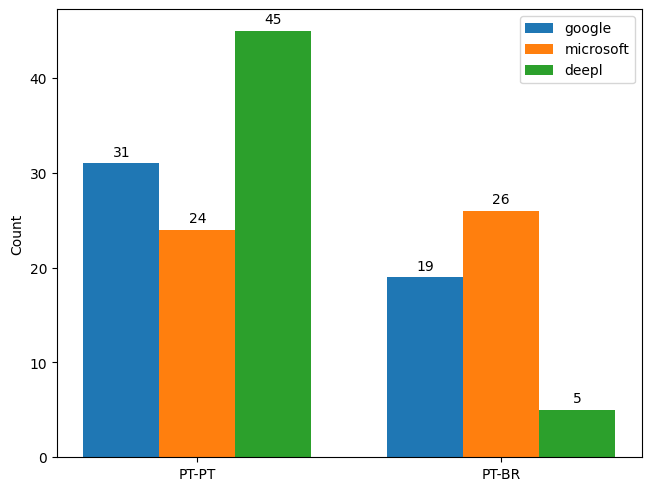

In [10]:
x = np.array([0, 1])
width = 0.25
multiplier = 0
fig, ax = plt.subplots(layout="constrained")
for model, result in count_results.items():
    values = [result[lang] for lang in languages]
    rects = ax.bar(x + multiplier, values, label=model, width=width)
    ax.bar_label(rects, padding=3)
    multiplier += width
ax.set_ylabel("Count")
ax.set_xticks(x + width, languages)
ax.legend()
plt.show()

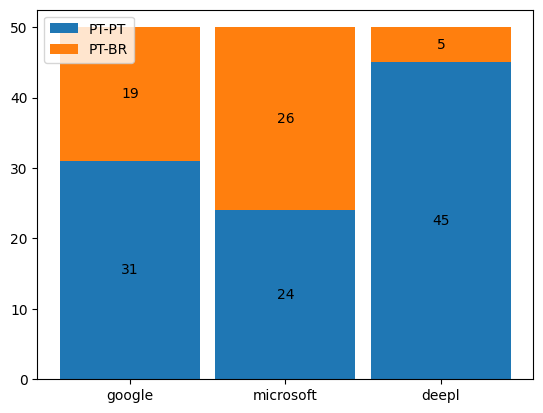

In [11]:
width = 0.9

fig, ax = plt.subplots()
bottom = np.zeros(len(models))
for lang in languages:
    values = [count_results[model][lang] for model in models]
    p = ax.bar(models, values, width, label=lang, bottom=bottom)
    bottom += values
    ax.bar_label(p, label_type="center")
ax.legend()
plt.show()

## Distribution of the confidence in the predictions.

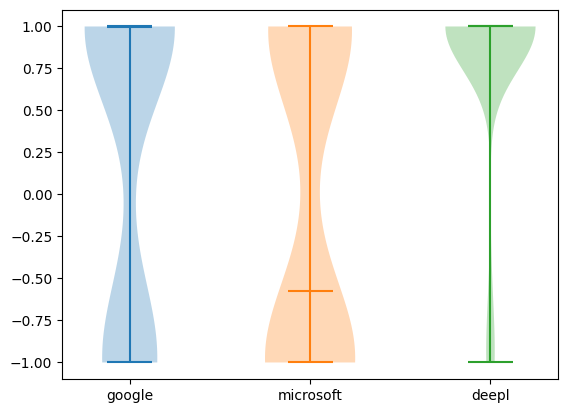

In [12]:
fig, ax = plt.subplots()
for model in models:
    pred = variety_results[model]
    values = [p["score"] if p["label"] == "PT-PT" else -p["score"] for p in pred]
    ax.violinplot(values, positions=[models.index(model)], showmedians=True)
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)

plt.show()

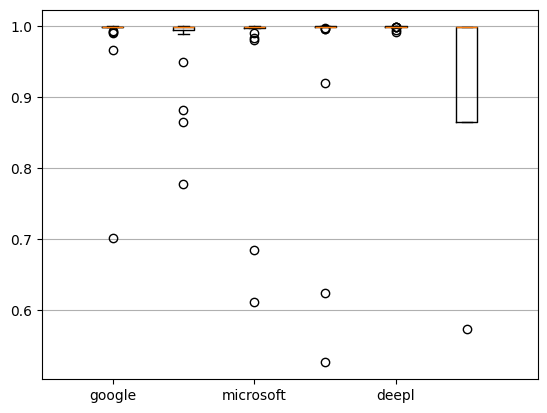

In [13]:
fig, ax = plt.subplots()
for model in models:
    pred = variety_results[model]

    pt_values = [p["score"] for p in pred if p["label"] == "PT-PT"]
    ax.boxplot(pt_values, positions=[models.index(model)])

    br_values = [p["score"] for p in pred if p["label"] == "PT-BR"]
    ax.boxplot(br_values, positions=[models.index(model) + 0.5])

ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
ax.yaxis.grid(True)

plt.show()

DeepL seems to produce the most amount of texts in PT-PT. Lets check the texts that were classified as PT-BR.

In [15]:
from pprint import pprint

for pred in variety_results["deepl"]:
    if pred["label"] == "PT-BR":
        pprint(pred)
        print()

{'label': 'PT-BR',
 'score': 0.9997416138648987,
 'text': 'nunca a separo de mim porque não quero que ela sinta que tenho '
         'vergonha dela'}

{'label': 'PT-BR',
 'score': 0.9998726844787598,
 'text': 'explico porque me agarrei a uma relação com um rapaz que era, em '
         'muitos aspectos, imaturo e descomprometido, apesar do entusiasmo que '
         'devia estar a sentir por ter sido aceite no programa de mestrado da '
         'universidade da Virgínia'}

{'label': 'PT-BR',
 'score': 0.5736342668533325,
 'text': 'sinto que só por causa de uma luta é que nos zangamos um com o outro '
         'e queremos fazer publicidade para que o mundo saiba da nossa luta'}

{'label': 'PT-BR',
 'score': 0.8651518821716309,
 'text': 'não me sinto culpada por não poder cozinhar para ele'}

{'label': 'PT-BR',
 'score': 0.9998224377632141,
 'text': 'também sei que não sinto mais do que uma afeição amigável por eles'}



To run the code cell below one needs to have previously executed the translation as the code is going to check the cached results.

In [2]:
import json

from src.contants import CACHE_PATH

predictions = {}
for filepath in CACHE_PATH.glob("*.json"):
    dataset, model = filepath.stem.split("_")
    content = json.load(filepath.open())
    print(model)
    print(len(content))
    predictions[model] = content

deepl
68
google
68
microsoft
68


In [26]:
variety_results = {}
for model, pred in predictions.items():
    print(model)
    variety = []
    for idx, translation in pred.items():
        pred = pipe(translation)[0]
        pred["text"] = translation
        pred["idx"] = idx
        variety.append(pred)
    variety_results[model] = variety

deepl
google
microsoft


In [27]:
count_results = {}
for model, result in variety_results.items():
    count = {}
    for pred in result:
        label = pred["label"]
        if label not in count:
            count[label] = 0
        count[label] += 1
    count_results[model] = count

In [28]:
count_results

{'deepl': {'PT-PT': 65, 'PT-BR': 3},
 'google': {'PT-PT': 63, 'PT-BR': 5},
 'microsoft': {'PT-PT': 64, 'PT-BR': 4}}

In [29]:
models = list(count_results.keys())
languages = ["PT-PT", "PT-BR"]

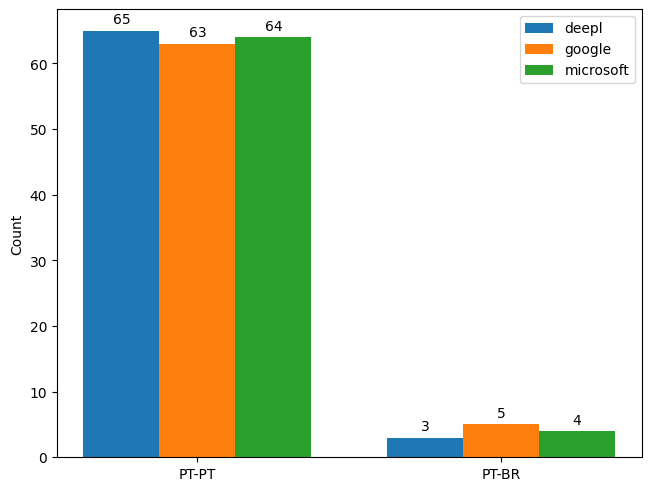

In [30]:
x = np.array([0, 1])
width = 0.25
multiplier = 0
fig, ax = plt.subplots(layout="constrained")
for model, result in count_results.items():
    values = [result[lang] for lang in languages]
    rects = ax.bar(x + multiplier, values, label=model, width=width)
    ax.bar_label(rects, padding=3)
    multiplier += width
ax.set_ylabel("Count")
ax.set_xticks(x + width, languages)
ax.legend()
plt.show()

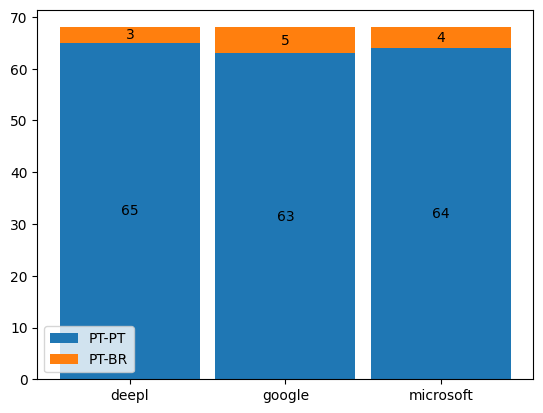

In [31]:
width = 0.9

fig, ax = plt.subplots()
bottom = np.zeros(len(models))
for lang in languages:
    values = [count_results[model][lang] for model in models]
    p = ax.bar(models, values, width, label=lang, bottom=bottom)
    bottom += values
    ax.bar_label(p, label_type="center")
ax.legend()
plt.show()

## Distribution of the confidence in the predictions.

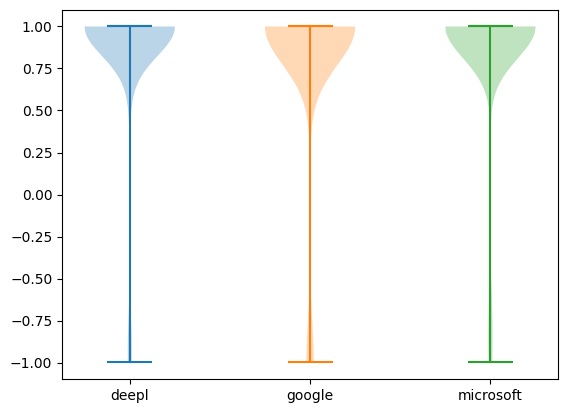

In [32]:
fig, ax = plt.subplots()
for model in models:
    pred = variety_results[model]
    values = [p["score"] if p["label"] == "PT-PT" else -p["score"] for p in pred]
    ax.violinplot(values, positions=[models.index(model)], showmedians=True)
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)

plt.show()

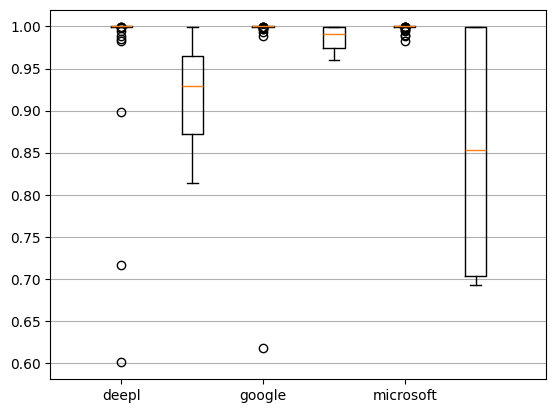

In [33]:
fig, ax = plt.subplots()
for model in models:
    pred = variety_results[model]

    pt_values = [p["score"] for p in pred if p["label"] == "PT-PT"]
    ax.boxplot(pt_values, positions=[models.index(model)])

    br_values = [p["score"] for p in pred if p["label"] == "PT-BR"]
    ax.boxplot(br_values, positions=[models.index(model) + 0.5])

ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
ax.yaxis.grid(True)

plt.show()

The model seems more confident that the text is brazilian portuguese on google predictions. Does google translator produces more definitive brazilian portuguese?

In [36]:
for pred in variety_results["google"]:
    if pred["label"] == "PT-BR":
        print(pred)
        print()

{'label': 'PT-BR', 'score': 0.9605305194854736, 'text': 'Próximo dos meios intelectuais de esquerda da época, o "Diario 16" estabeleceu-se ao lado do "El País" como uma referência no panorama mediático, até então dominado pela imprensa tradicional, nomeadamente a conservadora "ABC" e a católica "Ya". ” , agora desaparecido."O relançamento do título, na actual situação do mercado de imprensa em Madrid, envolve investimentos que o grupo La Voz de Galicia não está em condições de realizar sozinho sem riscos para as suas restantes actividades", afirma um editorial publicado na primeira página de seu número 8.824. O grupo La Voz de Galicia adquiriu o diário, fundado pelo grupo editorial do semanário "Cambio 16", em 16 de janeiro de 1998. Desde então, "a difusão cresceu ininterruptamente, mas sem atingir os níveis necessários para garantir a sua estabilidade" explica o editorial, que aborda também os prejuízos acumulados nos últimos quatro anos: 30 milhões de euros (6 milhões de contos). Um 